# EDA: describe

Es una ampliacion de la informacion descriptiva del metodo *describe()* de *Pandas*.

In [1]:
%matplotlib inline
import sys
sys.path.append('../../') 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 99
import numpy as np
from datetime import datetime
from eda import describe_info, describe_numeric, describe_categorical, describe_datetime, describe_bivariate, describe_missing, describe_duplicates, describe_outliers

---
## LOAD *Weather* data

In [2]:
path = 'https://raw.githubusercontent.com/jmquintana79/utilsDS/master/scripts/datasets/data/dataset.weather.csv.gz'
data = pd.read_csv(path)
data['datetime'] = pd.to_datetime(data['datetime'])
data['dtnow'] = [datetime(2022,1,1,12,0,0) for i in range(len(data))]
data['dtrandom'] = pd.to_datetime(np.sort(np.random.choice(pd.date_range('2015-01-01', '2018-01-01', freq='H'), len(data), replace=False)))
data.shape

(17544, 16)

### general info

In [3]:
describe_info(data)

,types,mixed_types,unique,magnitude,%nan,num_records
variable,,,,,,
datetime,datetime64[ns],pandas._libs.tslibs.timestamps.Timestamp,17544,NaN,0.00,17544
dtnow,datetime64[ns],pandas._libs.tslibs.timestamps.Timestamp,1,NaN,0.00,17544
dtrandom,datetime64[ns],pandas._libs.tslibs.timestamps.Timestamp,17544,NaN,0.00,17544
RH (%),float64,float,88,1.0,0.08,17530
WS (m/s),float64,float,108,0.0,0.06,17533
dew_point (degC),float64,float,434,1.0,0.08,17530
irradiation (MJ/m2),float64,float,362,0.0,40.93,10364
local_press (hPa),float64,float,481,3.0,0.00,17544
precipitation (mm),float64,float,38,0.0,80.52,3417


### numerical

In [4]:
# describe
dfn = describe_numeric(data, alpha = .05)
dfn

[info] Function "describe_numeric()" finished in 56.44 seconds.


,count,mode,mode_per,mean,std,std_norm,iqr,min,5%,25%,50%,75%,95%,max,kurtosis,skew,uniform,gaussian,unimodal
RH (%),17530,100.0,4.47,68.47,20.44,0.30,32.00,13.0,34.0,53.00,70.00,85.00,99.00,100.00,-0.89,-0.22,False,False,True
WS (m/s),17533,2.1,3.64,2.83,1.43,0.50,1.80,0.0,1.0,1.80,2.50,3.60,5.60,12.20,1.76,1.12,False,False,True
dew_point (degC),17530,22.1,0.58,9.77,10.32,1.06,18.40,-20.1,-7.2,0.90,10.70,19.30,23.90,27.30,-1.14,-0.24,False,False,True
irradiation (MJ/m2),10364,0.0,11.64,0.92,0.94,1.01,1.47,0.0,0.0,0.11,0.59,1.58,2.83,3.71,-0.26,0.91,False,False,False
local_press (hPa),17544,1008.2,0.64,1010.94,7.52,0.01,10.40,965.5,998.5,1005.90,1011.00,1016.30,1022.90,1031.30,0.38,-0.30,False,False,True
precipitation (mm),3417,0.0,59.17,0.94,2.21,2.36,1.00,0.0,0.0,0.00,0.00,1.00,4.60,40.00,45.60,5.14,False,False,False
sea-level pressure (hPa),17544,1014.3,0.61,1013.82,7.58,0.01,10.50,968.2,1001.4,1008.70,1013.90,1019.20,1025.90,1034.40,0.36,-0.29,False,False,True
sunlight_duration (h),9570,0.0,43.94,0.41,0.43,1.07,1.00,0.0,0.0,0.00,0.20,1.00,1.00,1.00,-1.65,0.37,False,False,False
temperature (degC),17544,22.1,0.54,16.17,8.18,0.51,14.00,-2.2,3.6,9.00,16.40,23.00,28.70,37.30,-1.11,-0.01,False,False,True
vapor_press (hPa),17530,4.4,0.76,14.62,8.82,0.60,15.80,1.2,3.6,6.50,12.80,22.30,29.70,36.30,-1.16,0.40,False,False,True


### categorical

In [5]:
# describe
dfc = describe_categorical(data, max_size_cats = 17, alpha = .05)
dfc

[info] Function "describe_categorical()" finished in 0.14 seconds.


,count,unique,uniform,value0,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,%value0,%value1,%value2,%value3,%value4,%value5,%value6,%value7,%value8,%value9,%value10,%value11,%value12,%value13,%value14,%value15,%value16
var,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WD,17533,17,False,NNW,NW,S,SSE,NNE,N,NE,SSW,SE,ENE,WNW,E,ESE,SW,W,WSW,C,15.21,13.43,10.26,9.9,7.21,7.07,6.78,5.27,5.26,4.92,4.81,2.89,2.15,1.76,1.52,1.49,0.07
cloud_coverage,5117,13,False,10-,10,0+,0,9,1,8,2,3,7,6,4,5,,,,,32.21,21.91,9.71,7.64,4.34,3.93,3.89,3.79,3.17,3.01,2.7,2.05,1.66,,,,


### datetimes

In [6]:
dfdt = describe_datetime(data)
dfdt

,count,unique,most_frequent,num_most_frequent,first,last,most_frequent_td,%most_frequent_td,num_td
datetime,17544,17544,NaT,NaN,2016-01-01 00:00:00,2017-12-31 23:00:00,"(0 days 01:00:00,)",100.00,1
dtnow,17544,1,2022-01-01 12:00:00,17544,2022-01-01 12:00:00,2022-01-01 12:00:00,"(0 days 00:00:00,)",100.00,1
dtrandom,17544,17544,NaT,NaN,2015-01-01 00:00:00,2017-12-31 22:00:00,"(0 days 01:00:00,)",66.83,10


### bivariate relationships

In [7]:
describe_bivariate(data, size_max_sample=500)

[warning] It has taken a random sample with 5000 records.
[info] it was simplified the categorical variable 'WD'.
[info] it was simplified the categorical variable 'cloud_coverage'.
[error] Function "analysis_num_num()": local variable 'pps12' referenced before assignment
[error] Function "analysis_cat_num()": singular matrix
[error] Function "describe_bivariate()": 'NoneType' object has no attribute 'copy'
[info] Function "describe_bivariate()" finished in 7.89 seconds.


### missing values

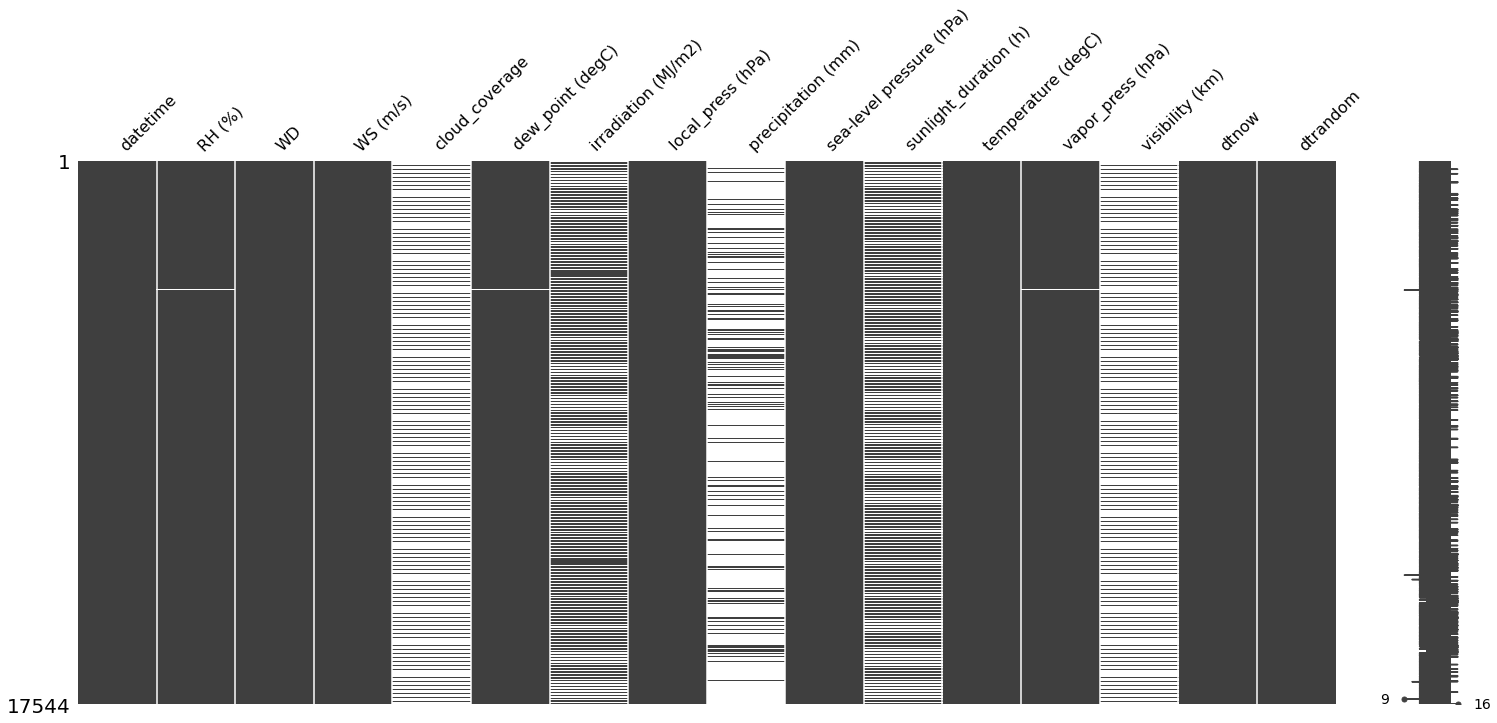

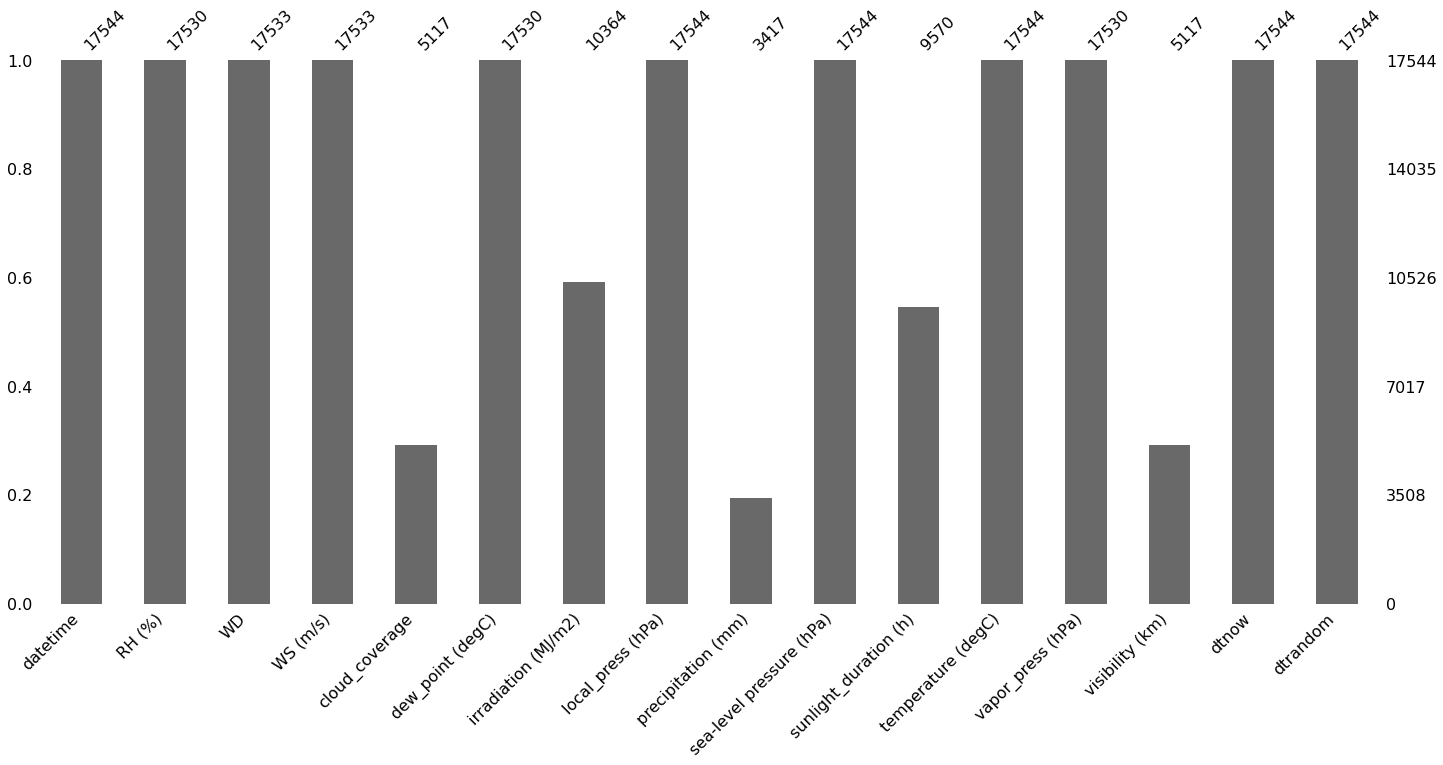

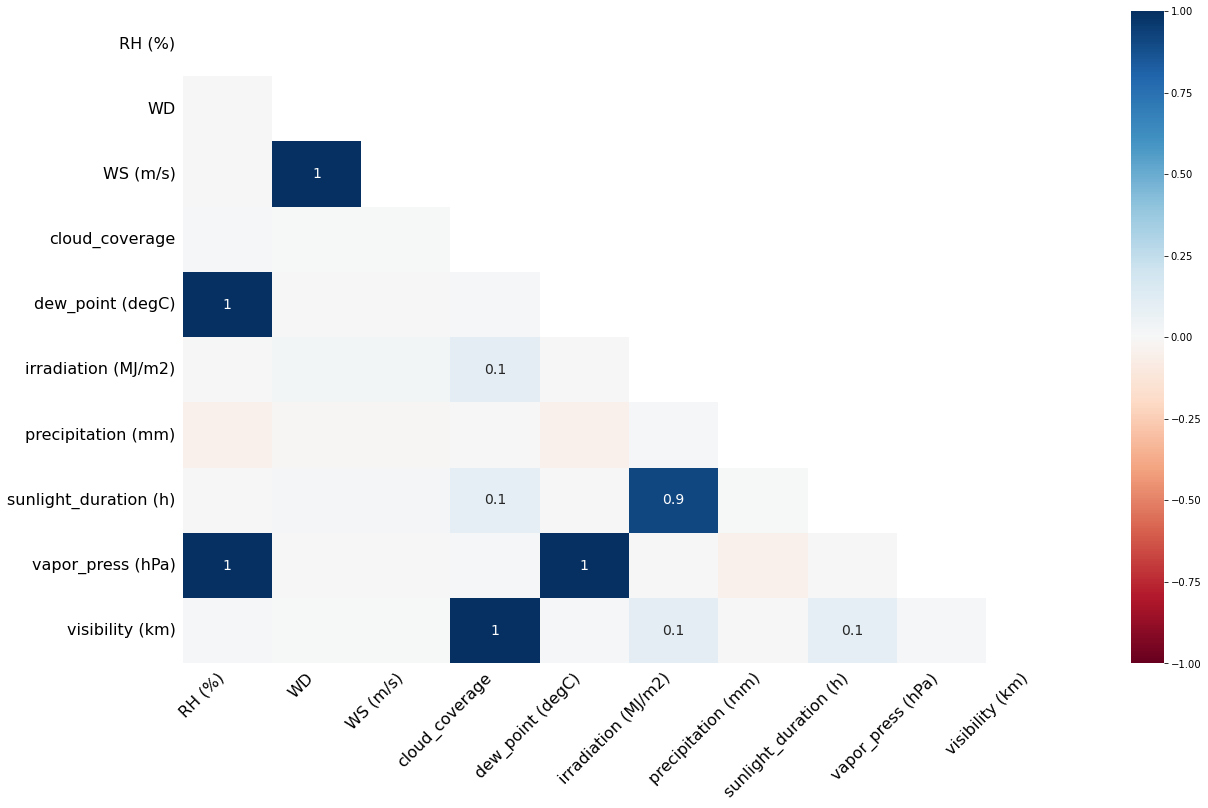

In [42]:
describe_missing(data)

### outliers analysis

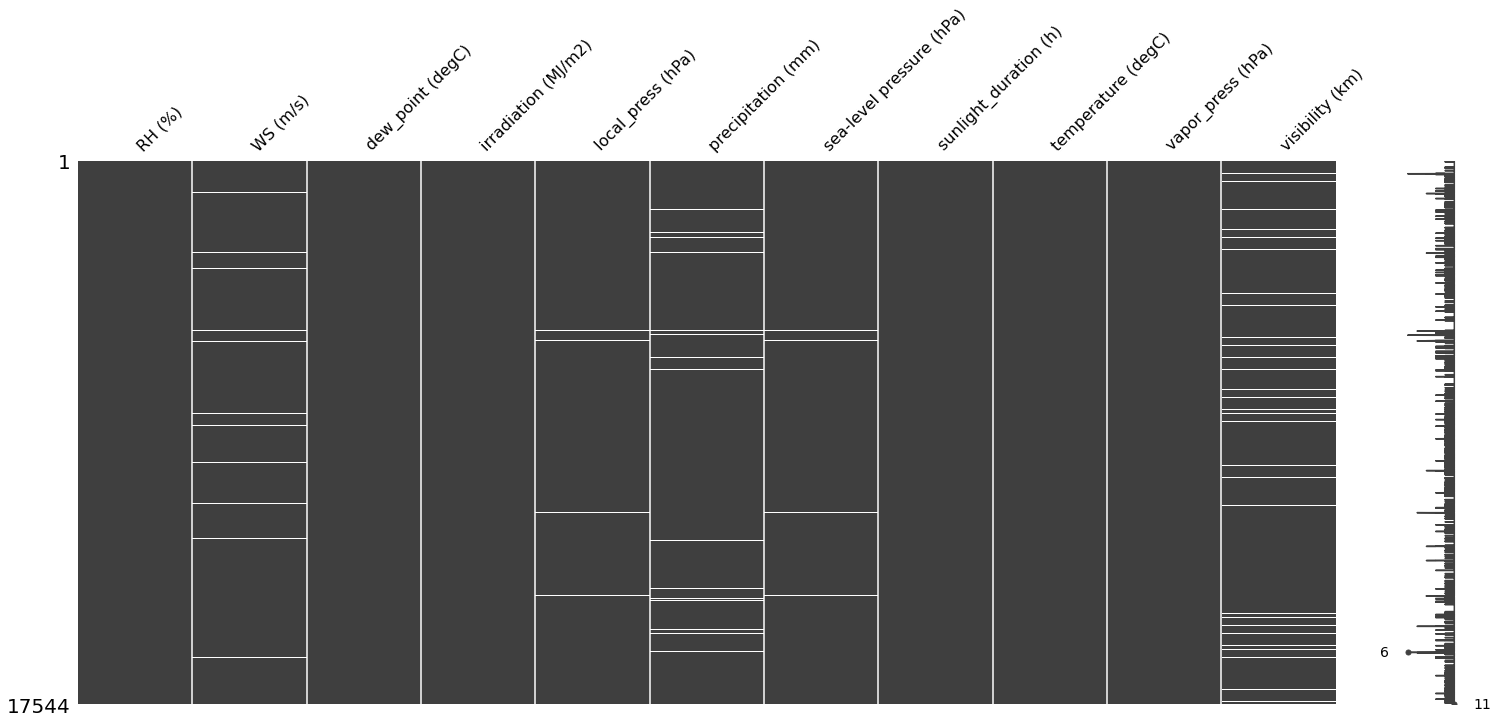

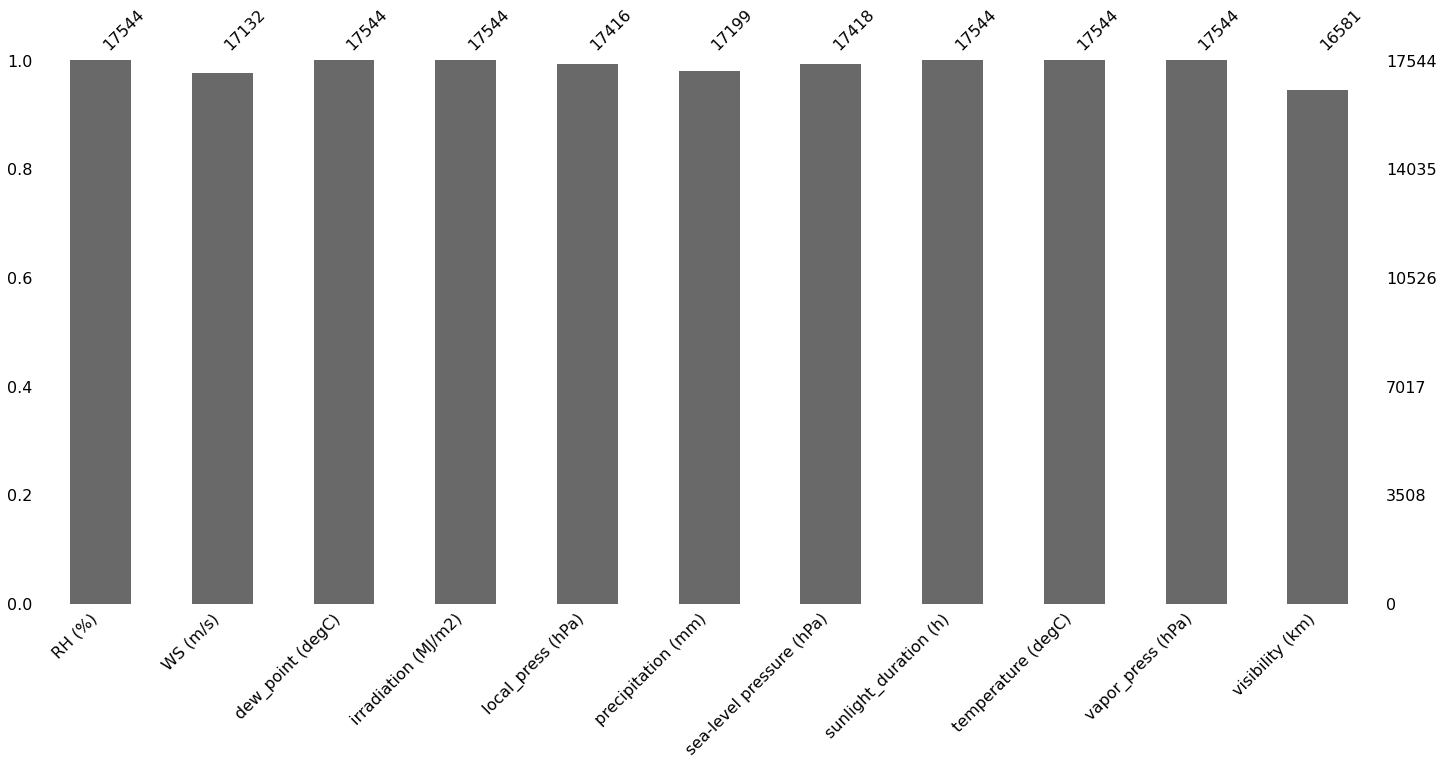

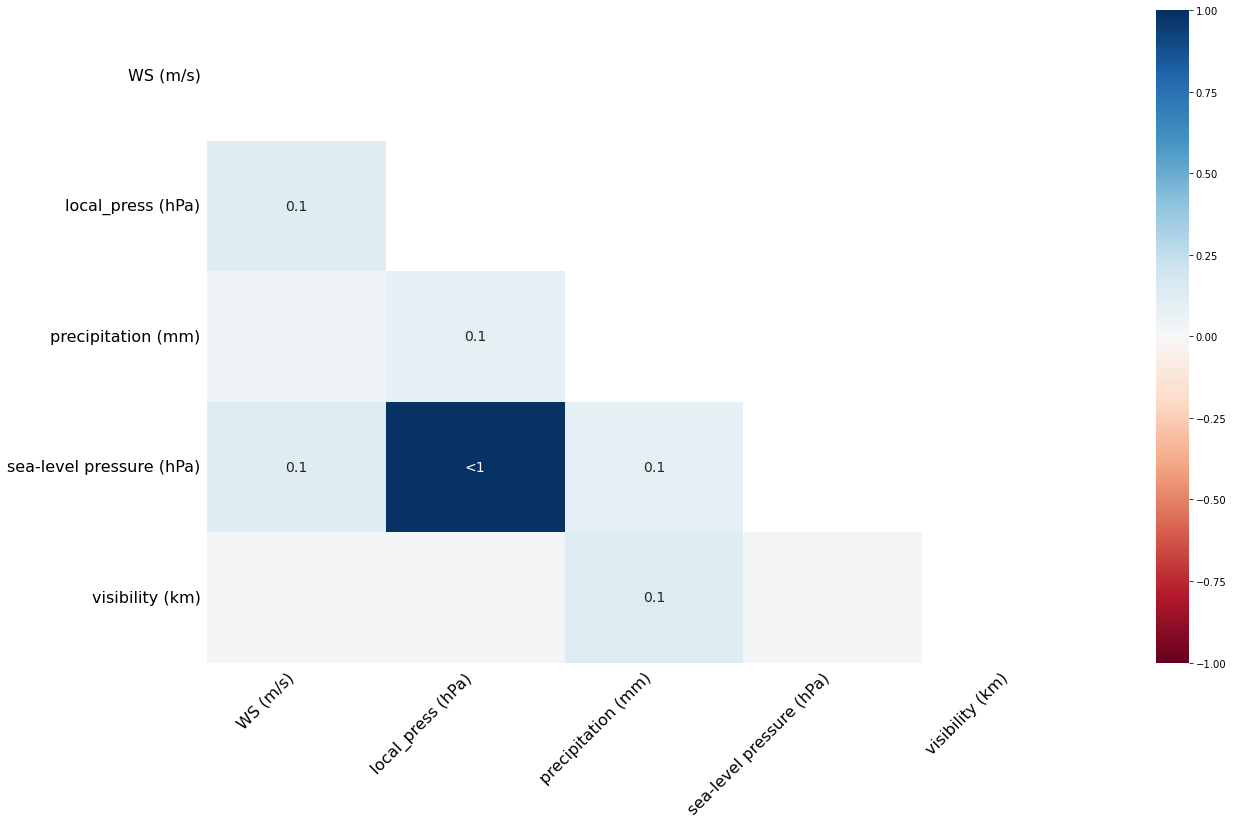

In [43]:
describe_outliers(data)

### duplicates

In [44]:
describe_duplicates(data)

[info] Function "describe_duplicates()" finished in 0.04 seconds.


,col0,col1,num_cols,percent_dupli
2,WD,cloud_coverage,2,98.717510
1,cloud_coverage,,1,99.920201
0,WD,,1,99.897401
